# Applied NLP Assessed Coursework

---

For this assessment, you are expected to complete and submit this notebook file. 
Marking guidelines are provided as a separate document and you should read this carefully.

## Important Information

**Individual assessment:**  
As this is assessed work, you should not talk about solutions to the coursework questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, then please ask me for clarification.

**Due date:**  
Your notebook should be submitted via Canvas, before 4pm on Thursday 29th November. The standard penalties will apply to any work submitted after the deadline.

**Submission format:**  
You should submit just one file that should be a Jupyter notebook.

**Weighting:**  
This assessment contributes 50% of the mark for the module.

**Word limit:**  
Your written answers in the Jupyter notebook should contain no more than 3000 words. Please be aware that standard penalties apply for deviations from this limit. You *must* specify the number of words in your report.

---

**Report Wordcount:** ???? words

## Generating A Unique Dataset
Some of the questions will require you to work with a sample of the Amazon Review Corpus data. In order to provide you with a unique dataset for analysis, you must enter your own candidate number in the following cell.

In [1]:
candidateno = 196980 

In [25]:
#preliminary imports
import sys
#sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
sys.path.append('C:/Users/Andreas/Desktop/ANLP/resources/resources')
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
from IPython.display import display
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('semcor')
from sussex_nltk.stats import evaluate_wordlist_classifier 
from nltk.corpus import stopwords
from classification_utils import *
import numpy as np
import math
from topic3 import *
from scipy import stats

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andreas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andreas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andreas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package semcor to
[nltk_data]     C:\Users\Andreas\AppData\Roaming\nltk_data...
[nltk_data]   Package semcor is already up-to-date!


## Question 1: Document Classification (35 marks)

This question is concerned with classifier performance on a document classification task. What is the relative performance of the word list and Naïve Bayes classifiers, and why?  Does more training data mean better performance?  Is performance degraded if we train on one domain and test on another domain? 

The question consists of three parts, each of which relates to the exercises from Lab Topic 4 Part 1: *Further Document Classification.* 

(a) You will have observed differences in accuracy between the wordlist classifier performance and the Naïve Bayes classifier performance. Describe what you observed, and by looking at classifier performance on a sample of product reviews (it is up to you to decide how many), discuss the reasons behind the differences in performance of the methods being compared. \[10 marks\]

In [3]:
dvdReader = AmazonReviewCorpusReader().category("dvd")
Word_List = [] 
Naive_Bayes = []
word_list_size = 100
counter = 10 # number of runs
trainPercentage = 0.7 # 70% for training and 30% for testing 

for i in range(counter):
    posTrain,negTrain,posTest,negTest = get_train_test_data(dvdReader, trainPercentage)
    Word_List.append(run_WL(pos_train, neg_train, pos_test, neg_test, word_list_size))
    Naive_Bayes.append(run_NB(pos_train, neg_train, pos_test, neg_test))

In [4]:
WordListMean = sum(Word_List)/counter
NaiveBayesMean = sum(Naive_Bayes)/counter

In [5]:
WordListSD = np.std(Word_List)
NaiveBayesSD = np.std(Naive_Bayes)

In [6]:
WordListSE = stats.sem(Word_List, axis = None, ddof = 0)
NaiveBayesSE = stats.sem(Naive_Bayes, axis = None, ddof = 0)

,Classifiers,Mean,Standard Deviation,Standard Error
0,Word List,0.6565,0.009471,0.002995
1,Naive Bayes,0.7945,0.001067,0.000337


[Text(0,0.5,'%'), Text(0.5,0,'Classifier')]

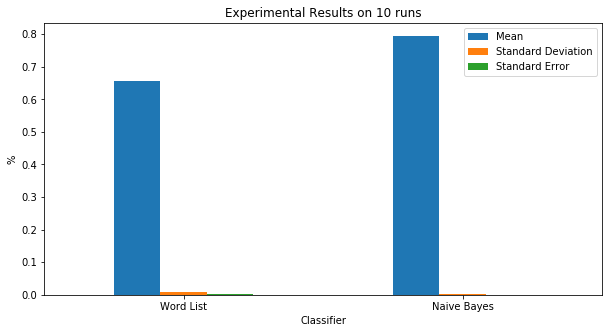

In [7]:
df = pd.DataFrame([('Word List', WordListMean, WordListSD, WordListSE),('Naive Bayes', NaiveBayesMean, NaiveBayesSD, NaiveBayesSE)])
df.columns = ['Classifiers', 'Mean', 'Standard Deviation', 'Standard Error']
display(df)
ax = df.plot.bar(title = 'Experimental Results on 10 runs', x = 0, rot = 0, figsize = (10,5))
ax.set(xlabel = 'Classifier', ylabel = '%')

## Code rundown
The code cells above show how I have used the AmazonReviewCorpus to read reviews of category 'dvd' and then split into training and testing sets of 70% and 30% respectively. By using the data on 10 repetitions on both classifiers, i have computed the mean of each algorithm as well as the standard deviation and standard error to better understand the findings which were then plotted on a bar chart. 


## Word List
Word List classifier works by taking two lists, one for positive words and one for negative words,for training and testing domains and the size that the words occurences must be above. The classifier then checks wether each word of the lists matches a list on the document and proceeds with accumulating the score with 1 when found and decreasing the score by 1 when it is not found. It also has a condition that if the number added to score is 0 to give a random prediction. 

## Naive Bayes
Very differently, Naive Bayes uses bag of words instead of lists. Therefore the order of which the data came in the classifier is not concerned. It uses a probabilistic model to see which words match which classes of positive or negative words which first computes the prioris of each sentence and then works out the conditional probability which is the times that each word is in a given class divided by the total of all the words in a given class. It then multiplies all probabilities of each class and returns the class with the higher probability of the classes worked on. 

## Comparison & Findings
As the bar chart shows, Naive Bayes produces more accurate results. This is subject to that Word List gives out random predictions when it can't find matches and is also subject to that Word List uses frequency rates. e.g.  A word that has 99 occurences when the frequency rate is 100, it will not be considered. These two main reasons show why Naive Bayes is the better classifier out of the two. As it can be seen from computing the Standard Deviation as well as the Standard Error on the bar chart, Naive Bayes has its data points closer to the mean rather than Word List and that data is less spread out on Naive Bayes. The standard error shows us that the sample mean of the data is closer to the true population mean on Naive Bayes even though the difference is very slight. 

(b) You have investigated the impact on classifier accuracy when the amount of training data is varied. Discuss your findings with regard to the Naïve Bayes classifier, and attempt to predict what the accuracy of the Naïve Bayes classifier would be if you massively increased the amount of training data. \[10 marks\]

The code below is included to enable you to get pre-formatted training and test data for a given category (evenly split between positive and negative reviews). 

In [8]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(category,ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given category and ratio, pre-formatted for use with NB classifier
    :param category: category of review corpus, one of ["kitchen, "dvd, "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    reader=AmazonReviewCorpusReader().category(category)
    random.seed(candidateno)
    pos_train, pos_test = split_data(reader.positive().documents(),ratio=ratio)
    neg_train, neg_test = split_data(reader.negative().documents(),ratio=ratio)
    train_data=[(feature_extract(review),'P')for review in pos_train]+[(feature_extract(review),'N') for review in neg_train]
    test_data=[(feature_extract(review),'P')for review in pos_test]+[(feature_extract(review),'N') for review in neg_test]
    return train_data,test_data


In [9]:
sample_sizes = [1, 10, 50, 100, 200, 400, 600, 700]

dvdReader = AmazonReviewCorpusReader().category("dvd")
#Naive_Bayes_Sum = 0
AccuracyNaiveBayes = []
counter = 10 # number of runs 

for size in sample_sizes:
    print("Sample Size: ", size)
    Naive_Bayes_Sum = 0
    for run in range(counter):
        training,testing = get_training_test_data('dvd', trainPercentage, candidateno) #unique call
        sampleOnTrain = sample(training,size)
        Naive_Bayes_Sum += run_NB_preformatted(sampleOnTrain,testing)
    AccuracyNaiveBayes.append(Naive_Bayes_Sum / counter)

Sample Size:  1
Sample Size:  10
Sample Size:  50
Sample Size:  100
Sample Size:  200
Sample Size:  400
Sample Size:  600
Sample Size:  700


,Sample Sizes,Naive Bayes Accuracy
0,1,0.50
1,10,0.49
2,50,0.65
3,100,0.66
4,200,0.72
5,400,0.76
6,600,0.75
7,700,0.77


(0.1, 1.0)

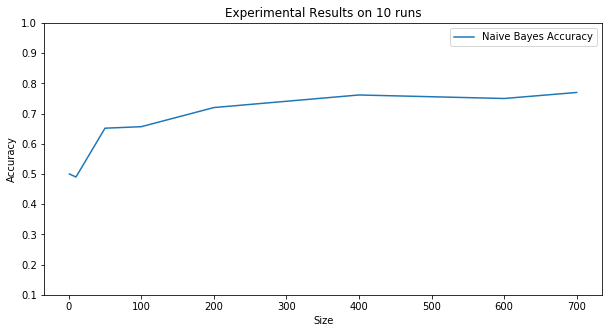

In [10]:
pd.set_option('precision', 2)
df = pd.DataFrame(list(zip(sample_sizes, AccuracyNaiveBayes)))
df.columns = ['Sample Sizes', 'Naive Bayes Accuracy']
display(df)
ax = df.plot(title = 'Experimental Results on 10 runs', x = 0, rot = 0, figsize = (10,5))
ax.set(ylabel = 'Accuracy',xlabel = 'Size')
ax.set_ylim(0.1,1.0)

## Code Rundown
By defining a list of sample sizes to use further on with Naive Bayes classifier we can observe how the accuracy changes when the sample size increases. Using the AmazonReviewCorpus, the dvd category is used for our analysis. By using two nested for loops, one for the different sizes used and another nested for the number of repetitions to run, which 10 repetitions where chosen to be used as data is very staple after 10 repetitions, we can then call the Naive Bayes classifier to compute our results. After that the data is plotted so we can see the changes in accuracy versus size.

## Findings
As it can be seen from the plot above, the accuracy of the classifier increases as the sample size increases, it doesn't have linear growth however. The findings show that accuracy will not go to 100% as the change rate after a sample size of 400 is very low. However it will keep increasing in tiny amounts but it is unlikely that with the small number of data available it will reach 100%.

Continuing on the matter, since it uses probability at each step, the accuracy increases while more data comes in meaning that even though change might not be big to the accuracy, it keeps on evolving as it is feeded data. The more data that is inputted to a Naive Bayes classifier, the better its accuracy is going to be thus it is a very good classifier model.

(c) You should now explore what happens to the accuracy of a Naïve Bayes classifier if you train the classifier on data from one domain (the source domain), but test on data from a different domain (the target domain). Investigate this issue using the 4 different domains (*book*, *dvd*, *electronics* and *kitchen*) from the Amazon Review Data. Note that this gives you *sixteen* different possibilities: 4 possible source domains x 4 possible target domains. Present your findings and try to explain what you observe. \[15 marks \]

In [11]:
bookTest, bookTrain = get_training_test_data("book",trainPercentage, candidateno)
dvdTest, dvdTrain   = get_training_test_data("dvd", trainPercentage, candidateno)
electronicsTest, electronicsTrain = get_training_test_data("electronics", trainPercentage, candidateno) 
kitchenTest, kitchenTrain  = get_training_test_data("kitchen", trainPercentage, candidateno)
source = {'book' : bookTrain,
          'dvd' : dvdTrain,
          'electronics' : electronicsTrain,
          'kitchen' : kitchenTrain}
target = {'book' : bookTest,
          'dvd' : dvdTest,
          'electronics' : electronicsTest,
          'kitchen' : kitchenTest}

allTogether = {}
for i in source.keys():
    allTogether[i]=[]
    for j in target.keys():
        allTogether[i].append((run_NB_preformatted(source[i],target[j])))

,book,dvd,electronics,kitchen
book,0.73,0.69,0.66,0.64
dvd,0.70,0.74,0.69,0.67
electronics,0.62,0.62,0.78,0.74
kitchen,0.64,0.64,0.77,0.80


Text(0,0.5,'%')

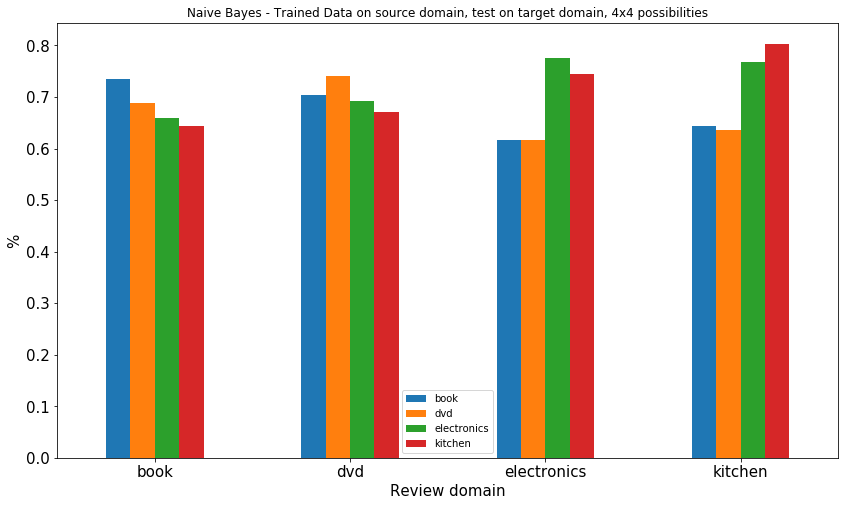

In [12]:
columns = ['book', 'dvd', 'electronics', 'kitchen']
df = pd.DataFrame(data = allTogether, index = columns , columns = columns)
display(df)
ax = df.plot.bar(title = 'Naive Bayes - Trained Data on source domain, test on target domain, 4x4 possibilities', rot = 0, figsize = (14,8), legend = True, fontsize = 15)
ax.set_xlabel('Review domain', fontsize = 15)
ax.set_ylabel('%', fontsize = 15)

### Finding correlation between Review domains through most used words on each domain

As it can be seen through the bar chart plotted above, the combination of book and dvd have the highest percentages of similarity between them and so does the combination of electronics and kitchen. Having that in mind, we will try and understand why that came to be by outputting the most used words from each domain. Ideally we will only look through positive reviews to find our similarities.

In [13]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

bookReader = AmazonReviewCorpusReader().category('book')
bookPosTrain, bookNegTrain, bookPosTest, bookNegTest = get_train_test_data(bookReader, trainPercentage)

dvdReader = AmazonReviewCorpusReader().category('dvd')
dvdPosTrain, dvdNegTrain, dvdPosTest, dvdNegTest = get_train_test_data(dvdReader, trainPercentage)

#positive
positiveBook = bookPosTrain + bookPosTest
positiveDvd = dvdPosTrain + dvdPosTest

pBook = get_all_words(positiveBook)
pDvd = get_all_words(positiveDvd)

book_filtered_pos_words = [w.lower() for w in pBook if w.isalpha() and w.lower() not in stopwords]
dvd_filtered_pos_words = [w.lower() for w in pDvd if w.isalpha() and w.lower() not in stopwords]

book_pos_freqdist = FreqDist(book_filtered_pos_words)
dvd_pos_freqdist = FreqDist(dvd_filtered_pos_words)

bookPosFinal = book_pos_freqdist.most_common(10)
dvdPosFinal = dvd_pos_freqdist.most_common(10)

#negative

negativeBook = bookNegTrain + bookNegTest
negativeDvd = dvdNegTrain + dvdNegTest

nBook = get_all_words(negativeBook)
nDvd = get_all_words(negativeDvd)

book_filtered_neg_words = [w.lower() for w in nBook if w.isalpha() and w.lower() not in stopwords]
dvd_filtered_neg_words = [w.lower() for w in nDvd if w.isalpha() and w.lower() not in stopwords]

book_neg_freqdist = FreqDist(book_filtered_neg_words)
dvd_neg_freqdist = FreqDist(dvd_filtered_neg_words)

bookNegFinal = book_neg_freqdist.most_common(10)
dvdNegFinal = dvd_neg_freqdist.most_common(10)

In [14]:
df = pd.DataFrame(list(zip(bookPosFinal,bookNegFinal,dvdPosFinal,dvdNegFinal)))
df.columns= ['book Pos', 'book Neg', 'dvd Pos', 'dvd Neg']
display(df)

,book Pos,book Neg,dvd Pos,dvd Neg
0,"(book, 1995)","(book, 2240)","(movie, 1029)","(movie, 1261)"
1,"(one, 677)","(one, 718)","(film, 896)","(film, 811)"
2,"(read, 640)","(read, 647)","(one, 799)","(one, 670)"
3,"(like, 374)","(would, 525)","(like, 477)","(like, 603)"
4,"(would, 358)","(like, 516)","(great, 470)","(dvd, 455)"
5,"(story, 336)","(much, 381)","(dvd, 454)","(would, 440)"
6,"(many, 333)","(books, 374)","(good, 402)","(good, 415)"
7,"(time, 323)","(good, 342)","(well, 343)","(even, 348)"
8,"(good, 301)","(even, 327)","(time, 326)","(get, 332)"
9,"(also, 298)","(time, 325)","(first, 313)","(really, 320)"


As it can be observed the samples holds various words that are the same such as 'one' 'like' 'good' 'time' verifying what was observed from the bar chart. We will continue by doing the same analysis on electronics and kitchen domains.

In [15]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

electronicsReader = AmazonReviewCorpusReader().category('electronics')
electronicsPosTrain, electronicsNegTrain, electronicsPosTest, electronicsNegTest = get_train_test_data(electronicsReader, trainPercentage)

kitchenReader = AmazonReviewCorpusReader().category('kitchen')
kitchenPosTrain, kitchenNegTrain, kitchenPosTest, kitchenNegTest = get_train_test_data(kitchenReader, trainPercentage)

#positive
positiveElectronics = electronicsPosTrain + electronicsPosTest
positiveKitchen = kitchenPosTrain + kitchenPosTest

pElectronics = get_all_words(positiveElectronics)
pKitchen = get_all_words(positiveKitchen)

electronics_filtered_pos_words = [w.lower() for w in pElectronics if w.isalpha() and w.lower() not in stopwords]
kitchen_filtered_pos_words = [w.lower() for w in pKitchen if w.isalpha() and w.lower() not in stopwords]

electronics_pos_freqdist = FreqDist(electronics_filtered_pos_words)
kitchen_pos_freqdist = FreqDist(kitchen_filtered_pos_words)

electronicsPosFinal = electronics_pos_freqdist.most_common(10)
kitchenPosFinal = kitchen_pos_freqdist.most_common(10)

#negative

negativeElectronics = electronicsNegTrain + electronicsNegTest
negativeKitchen = kitchenNegTrain + kitchenNegTest

nElectronics = get_all_words(negativeElectronics)
nKitchen = get_all_words(negativeKitchen)

electronics_filtered_neg_words = [w.lower() for w in nElectronics if w.isalpha() and w.lower() not in stopwords]
kitchen_filtered_neg_words = [w.lower() for w in nKitchen if w.isalpha() and w.lower() not in stopwords]

electronics_neg_freqdist = FreqDist(electronics_filtered_neg_words)
kitchen_neg_freqdist = FreqDist(kitchen_filtered_neg_words)

electronicsNegFinal = electronics_neg_freqdist.most_common(10)
kitchenNegFinal = kitchen_neg_freqdist.most_common(10)

In [16]:
df = pd.DataFrame(list(zip(electronicsPosFinal,electronicsNegFinal,kitchenPosFinal,kitchenNegFinal)))
df.columns= ['electronics Pos', 'electronics Neg', 'kitchen Pos', 'kitchen Neg']
display(df)

,electronics Pos,electronics Neg,kitchen Pos,kitchen Neg
0,"(one, 458)","(one, 478)","(one, 444)","(one, 488)"
1,"(use, 444)","(would, 423)","(use, 432)","(would, 356)"
2,"(great, 412)","(get, 371)","(great, 389)","(use, 315)"
3,"(good, 404)","(work, 336)","(like, 305)","(time, 287)"
4,"(sound, 353)","(product, 284)","(easy, 279)","(get, 280)"
5,"(like, 287)","(use, 277)","(well, 279)","(like, 247)"
6,"(would, 282)","(back, 258)","(would, 273)","(coffee, 238)"
7,"(quality, 280)","(bought, 255)","(pan, 245)","(product, 234)"
8,"(well, 255)","(time, 253)","(love, 237)","(even, 215)"
9,"(get, 254)","(unit, 242)","(time, 234)","(good, 209)"


Upon review of the most common words in electronics and kitchen we can see that words such as 'one' 'use' and 'great' can be seen on both domains top 10 places which is the reason why the showed such high percentages on our bar chart.

## General findings
By analysing the similarities of the different categories it can be said that since the words used to describe or review a book and a dvd or a kitchen equipment and electronics are similar, the observations that have been made are accurate and show that. e.g. A book review will use the word 'one' such as '..on one chapter..' and a dvd review will use the word 'one' such as '..on one scene..' which is why the bar chart shows these high values on the said categories.

## Question 2: Document Similarity and WordNet (30 marks)
Lab Topic 4, Part 2 is concerned with methods for measuring document similarity, while Lab Topic 5 explores the WordNet lexical resource and lexical relations. The objective of this question is to investigate whether incorporating lexical knowledge from WordNet might improve document similarity methods.  For example, knowing that both *tiger* and *leopard* are hyponyms of *big_cat* should increase the similarity between a document mentioning a *tiger* and a document mentioning a *leopard*.

The code below will generate two document collections, both in bag-of-words format, one from the Medline Corpus and one from the Wall Street Journal corpus.

In [19]:
from sussex_nltk.corpus_readers import MedlineCorpusReader
from sussex_nltk.corpus_readers import WSJCorpusReader
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

def normalise(tokenlist):
    tokenlist=[token.lower() for token in tokenlist]
    tokenlist=["NUM" if token.isdigit() else token for token in tokenlist]
    tokenlist=["Nth" if (token.endswith(("nd","st","th")) and token[:-2].isdigit()) else token for token in tokenlist]
    tokenlist=["NUM" if re.search("^[+-]?[0-9]+\.[0-9]",token) else token for token in tokenlist]
    return tokenlist

def filter_stopwords(tokenlist):
    stop = stopwords.words('english')
    return [w for w in tokenlist if w.isalpha() and w not in stop]

def stem(tokenlist):
    st=WordNetLemmatizer()
    return [st.lemmatize(token) for token in tokenlist]

   
def make_bow(somestring):
    rep=word_tokenize(somestring)  #step 1
    rep=normalise(rep)   #step 2
    rep=stem(rep)   #step 3
    rep=filter_stopwords(rep)  #step 4
    dict_rep={}
    for token in rep:
        dict_rep[token]=dict_rep.get(token,0)+1  #step 5
    return(dict_rep)

wsj=WSJCorpusReader()
medline=MedlineCorpusReader()

collectionsize=50
collections={"wsj":[],"medline":[]}

for key in collections.keys():
    if key=="wsj":
        generator=wsj.raw()
    else:
        generator=medline.raw()
    while len(collections[key])<collectionsize:
        collections[key].append(next(generator))

bow_collections={key:[make_bow(doc) for doc in collection] for key,collection in collections.items()}

a). For each step in the `make_bow()` function, **explain** what it does and why it is applicable when creating document representations for document similarity methods. 
\[10 marks\]

## Step 1
The process in this step is taken by word_tokenize which takes a sentence and returns the tokens of the sentence which can be words or punctuations or even numerical values.
## Step 2
The process in this step is that normalise 'normalises' each token meaning that any text becomes lowercase if it has any uppercase letters, any numerical data is changed into a string containing 'num' and any ordinal numericals are turned into 'nth' i.e. '1st' turns into 'nth'.
## Step 3
The process in this step is that stem uses lemmatisation which groups together the inflected formations of any word which would enable them to be analysed as one word rather than n different words. i.e. 'dvds' turns into 'dvd'.
## Step 4
The process in this step is that filter_stopwords checks if the word or token is in language english.
## Step 5
The process in this step is that the for loop acts in a way to add all the tokens in a dictionary.

All of the prior steps when used, make document similarity easier to the classifier to be used since tokens are in their purest form when make_bow finished working on a document. 

b). Apply a TF-IDF weighting to the representations and then compute: 
* the average cosine similarity of medline documents to each other, 
* the average cosine similarity of WSJ documents to each other,
* the average cosine similarity of medline documents to WSJ documents

\[10 marks\]

In [22]:
from math import log
from math import sqrt

def idf(doclist):
    N = len(doclist)
    feat_freqs = doc_freq(doclist)
    idfs = {}
    for feature, freq in feat_freqs.items():
        idfs[feature] = log(N) - log(feat_freqs[feature])
    return idfs

def convert_to_tfidf(docs, idf_values):
    tfidf_docs = []
    for doc in docs:
        tfidf = {}
        for feat,freq in doc.items():
            tfidf[feat] = freq * idf_values.get(feat,10*64)
        tfidf_docs.append(tfidf)
    return tfidf_docs

def all_similarities(docs1,docs2):
    return [doc_similarities(doc, docs2) for doc in docs1]

def doc_similarities(d, docs):
    return [cos_sim(d,doc) for doc in docs]

def average_similarity(docs1,docs2):
    all_sims = all_similarities(docs1, docs2)
    sum = 0
    for sims in all_sims:
        for sim in sims:
            sum += sim
    return sum/(len(docs1)*len(docs2))

def doc_freq(doclist):
    '''
    Take a list of documents (represented as bags-of-words) and return a dictionary specify how many documents each word occurs in
    :doclist: a list of dictionaries mapping String-->int
    :return: a dictionary mapping String-->int
    '''
    df={}
    for doc in doclist:
        for feat in doc.keys():
            df[feat]=df.get(feat,0)+1
            
    return df

def cos_sim(d1,d2):
    numerator = dot(d1,d2)
    denominator = sqrt(dot(d1,d1)*dot(d2,d2))
    return numerator/denominator

def dot(d1,d2):
    if len(d1) < len(d2):
        a = d1
        b = d2
    else:
        a = d2
        b = d1
    dotproduct = 0
    for word,count in a.items():
        dotproduct += count * b.get(word,0)
    return dotproduct

all_docs = bow_collections["wsj"] + bow_collections["medline"]     
idf_values = idf(all_docs)                                                           #STEP 1
wsj_docs_tfidf = convert_to_tfidf(bow_collections["wsj"], idf_values)                #STEP 2
medline_docs_tfidf = convert_to_tfidf(bow_collections["medline"], idf_values)        
all_docs_tfidf = {"wsj":wsj_docs_tfidf, "medline":medline_docs_tfidf}

collections = ["wsj", "medline"]
for c1 in collections:
    for c2 in collections:
        sim = average_similarity(all_docs_tfidf[c1],all_docs_tfidf[c2])             #STEP 3
        print("Average similarity of {} and {}: ".format(c1,c2), sim)               

Average similarity of wsj and wsj:  0.043967149445707614
Average similarity of wsj and medline:  0.0052102752780698175
Average similarity of medline and wsj:  0.0052102752780698106
Average similarity of medline and medline:  0.04889556546927367


## Code Rundown
Using the above code cell which is from Lab 4_2, the Average similarity of different collections has been computed. 
To compute the average similarity, first we must calculate idf values which are calculated through converting the list parameter to a dictionary that assigns each token to the frequency of it while also processing a logarithmic formula to add the idf values to the dictionary, then convert the idf values to tfidf values using the bow collection and the idf values given prior and then get the average similarity using the tfidf values which firstly computes all the similarities and the uses the cosine similarity formula to produce the result using the results of all similarities. 

c). Expand the document representations by adding **synonyms** and **hypernyms** for each **noun** in the document.  For example, 2 occurrences of the word *tiger* should add 2 occurrences of each of the following **lemma_names** found in the WordNet hypernym hierarchy above *tiger*:
* \['tiger', 'Panthera_tigris'\]
* \['big_cat', 'cat'\]
* \['feline', 'felid'\]
* \['carnivore'\]
* \['placental', 'placental_mammal', 'eutherian', 'eutherian_mammal'\]
* \['mammal', 'mammalian'\]
* \['vertebrate', 'craniate'\]
* \['chordate'\]
* \['animal', 'animate_being', 'beast', 'brute', 'creature', 'fauna'\]
* \['organism', 'being'\]
* \['living_thing', 'animate_thing'\]
* \['whole', 'unit'\]
* \['object', 'physical_object'\]
* \['physical_entity'\]
* \['entity'\]

Recompute the similarities calculated in part b).  Discuss your results. \[10 marks\]

## Question 3: Supervised Methods for WSD (35 marks)
Lab Topic 6 is concerned with corpus-based methods for word sense disambiguation (WSD). The objective of this question is to build and evaluate a corpus-based, supervised WSD system for words with multiple senses.  

a).  For each word occurring in the medline corpus (defined above), **write code** to find how many senses it has according to WordNet.  Print a list of the 10 most frequently occurring words with 2 senses (in this corpus). \[5 marks\]

In [53]:
#not working

from nltk.corpus import semcor
from nltk.corpus import wordnet as wn
import nltk
import operator
import random

bow_collection_medline = bow_collections['medline']

def twosenses(sample_sentences):
    words_with_two_senses = []
    for word, distribution in sample_sentences:
        if len(distribution) == 2:
            sense = list(distribution)[0]
            words_with_two_senses.append((word, distribution[sense]))
    return sorted(words_with_one_sense, key=lambda word: word[1], reverse=True)

twosenses(bow_collection_medline)

ValueError: too many values to unpack (expected 2)

b). A *supervised* WSD algorithm derives model(s) from *sense-annotated corpus data* in order to predict senses of ambiguous words in un-annotated data.  Using the entire document as context, **implement** a supervised word sense disambiguation algorithm to determine the most likely sense of each occurrence of the 3 most frequently occuring words identified in part a). \[10 marks\]

c). Evaluate the performance of your WSD system.  How accurate is it for each of the 3 words? **Comment** on the strengths and weaknesses of your WSD system. \[10 marks\] 

## Strengths
Naive Bayes gives us precise statistical results which are far superior to using any other methods.

## Weaknesses
Using this WSD requires a lot of computing power as it is cumbersome to browse through the whole annotated corpus

d) How could you extend or improve your WSD system?  You are **not** expected to code any of these extensions or improvements, but your answer should give sufficient details to make it clear how they might be carried out in practice. \[10 marks\]

## Improvements
Even though it is very hard to improve the WSD system, some changes that may improve partly by the introduction of Bootstrapping with some improvements in accuracy and precision. Another way of improving our WSD is by increasing our training data which would provide better results at the end. 


You can use the code below to verify that the length of your submission (i.e. written answers in Markdown cell) does not exceed 3000 words. To do this, you need to change the value of `filepath` so that it is set to the file location of your notebook. Note that the written questions in this notebook have a total wordcount of 1087. This is taken into account by the code below so that running the code will only show the wordcount of additional written answers in Markdown cells. 

In [54]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1087

import io
from nbformat import current

filepath = 'C:/Users/Andreas/Desktop/ANLP/Assignment/ANLP1819_Assignment.ipynb'

question_count=1087

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1294
